# XRAY Tutorial
This shows how to interact with some NetCDF time series data using XRAY

To open this in the browser type:

```
ipython notebook tutorial_name.ipynb
```

In [22]:
import xray

Load the data as an xray.Dataset object

In [17]:
ncfile = '../DATA/_for_Ed_GalvestonFluxes_Apr2009.nc'
ds = xray.open_dataset(ncfile,engine='netcdf4')

Data variables:
    *empty*


This Dataset is empty because the data are stored in Groups. 

There does not appear to be a way of interavtively exploring groups in xray v0.6.1

In [20]:
# To get the groups from a netcdf4 file use netcdf4-python (this should be in xray!)
from netCDF4 import Dataset
nc = Dataset(ncfile)
print nc
print nc.groups.keys()

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    dimensions(sizes): 
    variables(dimensions): 
    groups: Bolivar_Roads

[u'Bolivar_Roads']


In [21]:
group = nc.groups.keys()[0]
ds = xray.open_dataset('../DATA/_for_Ed_GalvestonFluxes_Apr2009.nc', group=group)
print ds

<xray.Dataset>
Dimensions:  (time: 720)
Coordinates:
  * time     (time) datetime64[ns] 2009-04-01 2009-04-01T01:00:00 ...
Data variables:
    Q        (time) float64 -5.587e+03 -7.86e+03 -9.569e+03 -1.027e+04 ...
    Qin      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Qout     (time) float64 -5.587e+03 -7.86e+03 -9.569e+03 -1.027e+04 ...
    Vwind    (time) float64 -6.276 -5.893 -5.981 -6.176 -6.188 -5.807 -5.216 ...
    Uwind    (time) float64 0.1883 0.4697 0.6745 0.9374 0.9862 0.6239 ...
    eta      (time) float64 0.1432 0.06251 -0.01712 -0.07501 -0.1317 -0.2081 ...
    x        float64 3.268e+05
    y        float64 3.248e+06


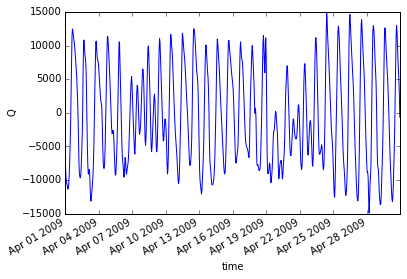

In [13]:
# Now plot the data
%matplotlib inline # This is only necessary for the notebook
ds.Q.plot()


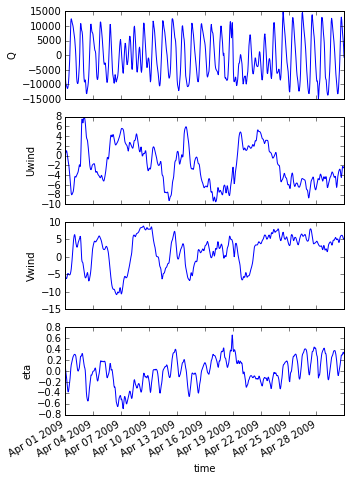

In [25]:
# Plot everything together
plt.figure(figsize=(5,8))
plt.subplot(411)
ds.Q.plot()
plt.subplot(412)
ds.Uwind.plot()
plt.subplot(413)
ds.Vwind.plot()
plt.subplot(414)
ds.eta.plot()

In [14]:
# Metadata is also stored in the variable attributes
print ds.Q.attrs

OrderedDict([(u'units', u'm3 s-1'), (u'long_name', u'Volume flux rate')])


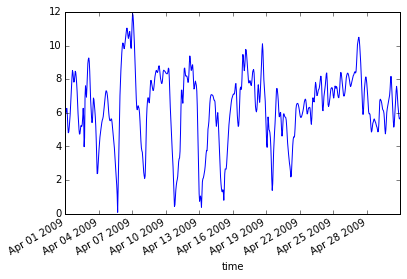

In [26]:
# You can treat each variable like a numpy array to compute other quantities e.g.,...
import numpy as np
speed = np.sqrt( ds.Uwind**2 + ds.Vwind**2)
speed.plot()